# Apprentisage non-supervisé:

Le but de ce TP est d'implémenter et tester les algorithmes vues en classes.

## Clustering hiérarchique:

On commence par implémenter le premier algorithme. le bout de code suivant contient des fonctions qui vont être utilisées dans le reste du TP.

1. 
Exécuter la cellule suivante:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


def plot_points(points, ax, color):
    """
        Plots points.
        :param points: the points to plot
        :type points: iterable
        :param ax: the axis to plot in
        :type ax: matplotlib.axis
        :param color: the plotted points color
        :type color: str
    """
    ax.scatter(points[:, 0], points[:, 1], c=color)

    
def plot_dataset(X, Y, ax, **parameters):
    """
        Plots the dataset.
        :param X: the points to plot
        :type X: np.array
        :param Y: the points classes
        :type Y: np.array
        :param ax: the axis to plot in
        :type ax: matplotlib.axis
        :param colors: the plotted points colors depending on the class
        :type colors: iterable
    """
    for x, color in zip([X[Y==y] for y in set(Y)], parameters['colors']):
        plot_points(x, ax, color)


On génère un jeu de donner simple pour tester les algorithmes à implémenter de la façon suivante.

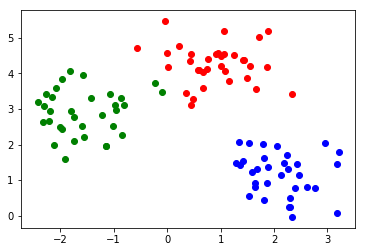

In [2]:
import sklearn.datasets

X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=0.60)
f, ax = plt.subplots(1, 1)
plot_dataset(X, Y, ax, colors=['r', 'b', 'g'])

On présente, ci-dessous, les fonctions à utiliser pour comparer les ensembles.

In [3]:
def distances(A, B, metric):
    """
        Compute the list of all distances between elements from sets A and B based on the `metric' distance.
        :param A: the left hand operand
        :type A: set
        :param B: the right hand operand
        :type B: set
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: list
    """
    return [
            metric(a, b)
            for a in A
            for b in B
        ]
    

def minimum_metric(metric):
    """
        Compute the minimum distance between sets A and B based on the `metric' distance.
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: callable
    """
    return lambda A, B: min(distances(A, B, metric))


def maximum_metric(metric):
    """
        Compute the maximum distance between sets A and B based on the `metric' distance.
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: callable
    """
    return lambda A, B: max(distances(A, B, metric))


def mean_metric(metric):
    """
        Compute the mean distance between sets A and B based on the `metric' distance.
        :param metric: the distance to be used
        :type metric: callable
        :return: the distance
        :rtype: callable
    """
    return lambda A, B: sum(distances(A, B, metric)) / (len(A) * len(B))


def array2tuples(feats):
    """
        Transform an attributes matrix to a list of tuples which is hashable. This may be handy when it is necessary to have hashable data.
        :param feats: the feature matrix where lines are instances and columns are dimensions
        :type feats: np.array
        :return: the list of tuple representation.
        :rtype: list
    """
    return [tuple(x) for x in feats]


def tuples2array(tuples):
    """
        Transform a list of tuples to an attributes matrix.
        :param tuples: the list of tuple representations
        :type tuples: np.array
        :return: feature matrix where lines are instances and columns are dimensions
        :rtype: np.array
    """
    return np.array([list(x) for x in tuples])



print('Example:')
A = set(array2tuples(X[Y==0]))
print('A = ', A)
B = set(array2tuples(X[Y==1]))
print('B = ', B)
euclidian = lambda x, y: np.linalg.norm(np.array(x) - np.array(y))
print('\nOn utilise la distance Euclidienne: ', euclidian)
print('La distance minimale entre A et B est:', minimum_metric(euclidian)(A, B))
print('La distance maximale entre A et B est:', maximum_metric(euclidian)(A, B))
print('La distance moyenne entre A et B est:', mean_metric(euclidian)(A, B))

Example:
A =  {(1.6599104892724754, 3.5628918352361985), (1.1641106995370358, 3.791329883867355), (1.4949317978621983, 3.858488315204525), (0.9593607415433021, 4.56078644976664), (0.4883823093198226, 3.268017766049384), (0.44359862996842747, 3.1153094465140336), (0.34713829950623953, 3.451776565141005), (0.6697869960051712, 3.5954080169749427), (0.7438739881017237, 4.122405677103188), (1.7144444869831275, 5.025215236719037), (1.8959376071615694, 5.185402589388561), (1.0626962212430218, 5.176351431626175), (-0.5555238109539522, 4.695958484712606), (0.00793137001172417, 4.1761431593200085), (0.595676822337917, 4.086142627856107), (0.4389901418302897, 4.535928826163947), (0.7675227889508035, 4.397596708910778), (0.670478769495503, 4.0409427464816785), (0.43189105991654975, 4.334954564926074), (0.9143387674703604, 4.550146428611414), (0.5727938098809244, 4.088055430524065), (0.22459286251653932, 4.770281540947536), (1.2425880181937505, 4.50399192387295), (1.4328927136346912, 4.376792337344

2. 
Implémenter l'algorithme de clustering hiérarchique ascendant en complétant les fonctions présenter ci-dessous.

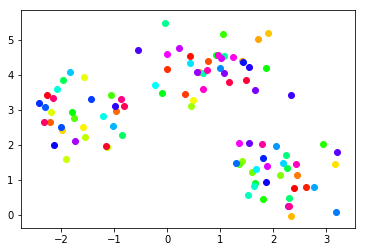

In [10]:
import functools, operator


def minimal_couples(P, group_metric):
    """
        Find the partition index couples that minimizes the `group_metric' over all couples from the partition S.
        :param P: the list of all sets forming the features partition.
        :type P: list
        :param group_metric: the metric to compare partitions
        :type group_metric: callable
        :return: the list of couples (s, l) minimizing (s, l) --> group_metric(P[s], P[lP]).
        :rtype: list
    """
    # Hint: Use built-in python sort function `sorted' on a list of tuples containing the couple (s, l) and the value group_metric(P[s], P[l])
    return 


def prune_minimizers(couples):
    """
        Prune couples into a list of partition indexes to group.
        :param group_metric: the metric to compare partitions
        :type group_metric: callable
        :return: the list of couples (s, l) minimizing (s, l) --> group_metric(S[s], S[l]).
        :rtype: list
    """
    # Hint: Use sets for unicity
    return 


def update_clustering(indexes_to_cluster, P):
    """
        Updates the partition based on the indexes of partitions to cluster.
        :param indexes_to_cluster: list of indexes of partition to cluster
        :type indexes_to_cluster: list
        :param P: the list of all sets forming the features partition.
        :type P: list
        :return: the new partition
        :rtype: list
    """
    # Group sets from partition `P' with indexes `indexes_to_cluster'
    # Keep the rest unchanged
    return P
    

def hierarchical_clustering(X, group_metric=euclidian, T=100, K=3):
    """
        The hierarchical clustering algorithm.
        :param X: the feature matrix
        :type X: np.array
        :param group_metric: the metric to compare partitions
        :type group_metric: callable
        :param T: maximal iterations
        :type T: int
        :param K: wanted number of clusters
        :type K: int
        :return: The list of partitions per iteration
        :type: list
    """
    initial_partition = [set([x]) for x in array2tuples(X)]
    cl = len(initial_partition)
    S = [None] * (T + 1) # Do not append: it is very slow
    S[0] = initial_partition
    t = 0
    while t < T and cl > K:
        t = t + 1
        couples = minimal_couples(S[t-1], group_metric) # Minimal couples
        indexes_to_cluster = prune_minimizers(couples) # Minimal indexes grouped
        S[t] = update_clustering(indexes_to_cluster, S[t-1])
    S = [s for s in S if S is not None] # Clear None values from Partions list
    return S

S = hierarchical_clustering(X)
clusters = np.array(
        functools.reduce(
        operator.add,
        [[cls] * len(set_cls) for (cls, set_cls) in enumerate(S[-1])]
    )
)
H = np.concatenate([tuples2array(x) for x in S[-1]])
f, ax = plt.subplots(1, 1)
cmap = plt.cm.get_cmap('hsv', len(clusters))
plot_dataset(H, clusters, ax, colors=[cmap(clr) for clr in range(len(clusters))])